
#  Airline Sentiment Data Cleaning
 **Dataset**: `Tweets.csv`  
**Goal**: Clean the dataset for sentiment analysis and EDA.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## 2. Load Data

In [2]:
# Load the dataset
df = pd.read_csv("Tweets.csv")


In [3]:
# Initial inspection
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

Shape: (14640, 15)

Columns: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']

Missing Values:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


### 3. Drop Unnecessary Columns

In [4]:
# Remove columns with >90% missing data or no analytical value
df = df.drop(columns=['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'])

# Verify
print("Columns after removal:", df.columns.tolist())

Columns after removal: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text', 'tweet_created', 'tweet_location', 'user_timezone']


### 4. Handle Missing Values

In [5]:
# Fill missing categorical values
df['negativereason'] = df['negativereason'].fillna('Not Specified')
df['tweet_location'] = df['tweet_location'].fillna('Unknown')
df['user_timezone'] = df['user_timezone'].fillna('Unknown')

# Fill missing numerical values (negativereason_confidence)
df['negativereason_confidence'] = df['negativereason_confidence'].fillna(0)

# Verify
print("\nMissing Values After Cleaning:\n", df.isnull().sum())



Missing Values After Cleaning:
 tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64


### 5. Clean Text Data

In [6]:
def clean_text(text):
    # Remove mentions (@user), URLs, and special characters
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Verify
print("\nSample Cleaned Text:")
print(df[['text', 'clean_text']].head(2))



Sample Cleaned Text:
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   

                                          clean_text  
0                                         What  said  
1  plus youve added commercials to the experience...  


### 6. Fix Timestamps

In [7]:
# Convert to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'], format='ISO8601')

# Extract time features
df['hour'] = df['tweet_created'].dt.hour
df['day_of_week'] = df['tweet_created'].dt.day_name()

# Verify
print("\nTime Features:")
print(df[['tweet_created', 'hour', 'day_of_week']].head(2))


Time Features:
              tweet_created  hour day_of_week
0 2015-02-24 11:35:52-08:00    11     Tuesday
1 2015-02-24 11:15:59-08:00    11     Tuesday


### 7. Add VADER Sentiment Scores

In [12]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Add scores
df['vader_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['vader_sentiment'] = df['vader_score'].apply(
    lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral'
)

# Verify
print("\nVADER Sentiment Sample:")
print(df[['clean_text', 'vader_sentiment']].head(5))


VADER Sentiment Sample:
                                          clean_text vader_sentiment
0                                         What  said         neutral
1  plus youve added commercials to the experience...         neutral
2  I didnt today Must mean I need to take another...         neutral
3  its really aggressive to blast obnoxious enter...        negative
4            and its a really big bad thing about it        negative


### 8. Save Cleaned Data

In [15]:
# Save to a new CSV file
df.to_csv("Cleaned_Tweets.csv", index=False)
print("Cleaned dataset saved as 'Cleaned_Tweets1.csv'.")

Cleaned dataset saved as 'Cleaned_Tweets1.csv'.


Shape: (14640, 15)

Columns: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']

Missing Values:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64
Columns after removal: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativ

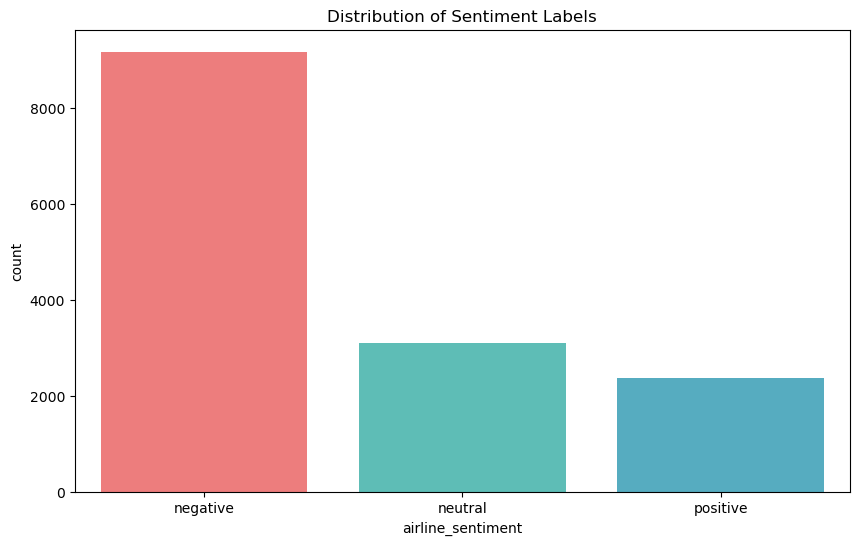

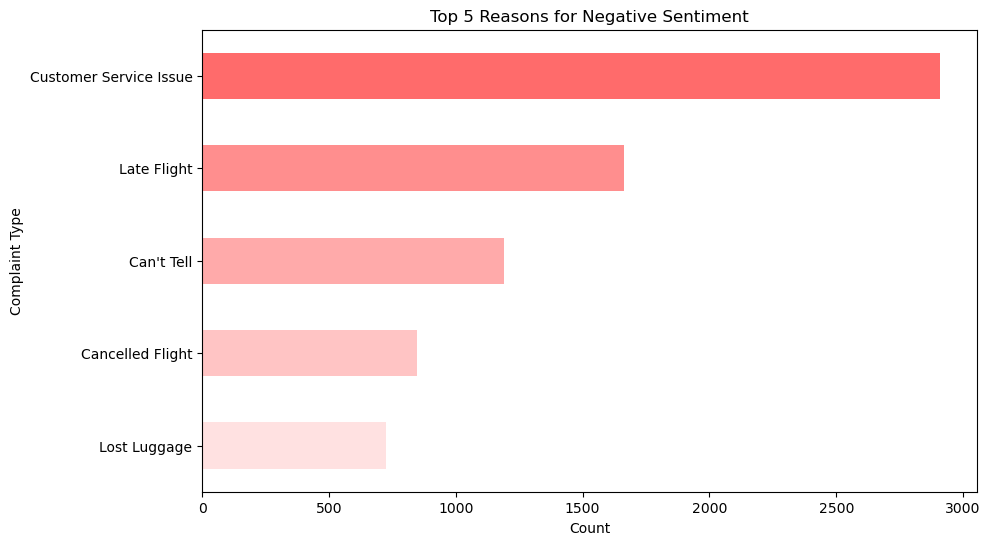

In [1]:









# %% [markdown]
# ## 

# %% 


# %% [markdown]
# ## 9. Visualizations (Optional)

# %% 
# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(
    x='airline_sentiment', 
    data=df, 
    order=['negative', 'neutral', 'positive'],
    palette=['#ff6b6b', '#4ecdc4', '#45b7d1']
)
plt.title("Distribution of Sentiment Labels")
plt.show()

# %% 
# Top 5 complaints
negative_df = df[df['airline_sentiment'] == 'negative']
top_complaints = negative_df['negativereason'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_complaints.plot(kind='barh', color=['#ff6b6b', '#ff8e8e', '#ffaaaa', '#ffc4c4', '#ffe1e1'])
plt.gca().invert_yaxis()
plt.title("Top 5 Reasons for Negative Sentiment")
plt.xlabel("Count")
plt.ylabel("Complaint Type")
plt.show()
